<a href="https://colab.research.google.com/github/hanzlayyy/FYDP/blob/main/FYDP_Notebook_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random as rd
from sklearn.metrics import r2_score

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/hanzlayyy/FYDP/main/data%20v1.csv')
df

,layer_height,infill_density,infill_pattern,nozzle_temperature,print_speed,material,roughness
0,0.02,90.0,grid,220,40.0,abs,25.0
1,0.02,90.0,honeycomb,225,40.0,abs,32.0
2,0.02,80.0,grid,230,40.0,abs,40.0
3,0.02,70.0,honeycomb,240,40.0,abs,68.0
4,0.02,90.0,grid,250,40.0,abs,92.0
...,...,...,...,...,...,...,...
654,0.20,40.0,NaN,195,30.0,pla,8.9
655,0.20,50.0,NaN,195,30.0,pla,4.9
656,0.30,30.0,NaN,195,30.0,pla,5.1
657,0.30,40.0,NaN,195,30.0,pla,19.3


In [10]:
df.dropna(thresh=6, inplace=True)
df

,layer_height,infill_density,infill_pattern,nozzle_temperature,print_speed,material,roughness
0,0.02,90.0,grid,220,40.0,abs,25.0
1,0.02,90.0,honeycomb,225,40.0,abs,32.0
2,0.02,80.0,grid,230,40.0,abs,40.0
3,0.02,70.0,honeycomb,240,40.0,abs,68.0
4,0.02,90.0,grid,250,40.0,abs,92.0
...,...,...,...,...,...,...,...
654,0.20,40.0,NaN,195,30.0,pla,8.9
655,0.20,50.0,NaN,195,30.0,pla,4.9
656,0.30,30.0,NaN,195,30.0,pla,5.1
657,0.30,40.0,NaN,195,30.0,pla,19.3


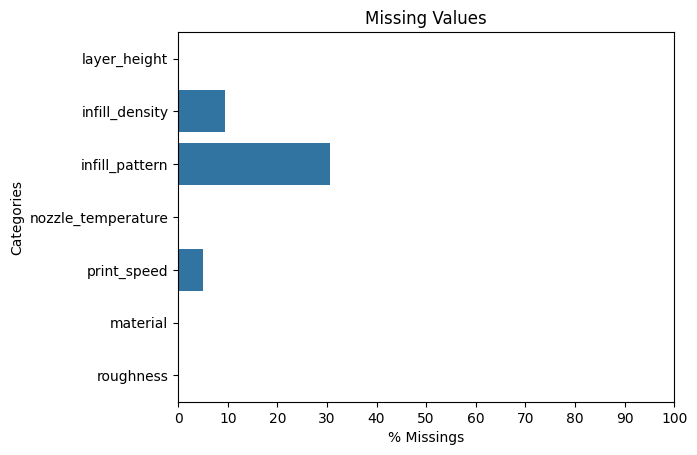

In [11]:
x_1 = pd.Series(df.isnull().mean()*100).values
y_1 = pd.Series(df.isnull().mean()*100).index
sns.barplot(x=x_1, y=y_1, orient='h')
plt.xlabel('% Missings')
plt.xticks(range(0, 110, 10))
plt.ylabel('Categories')
plt.title('Missing Values')
plt.show()

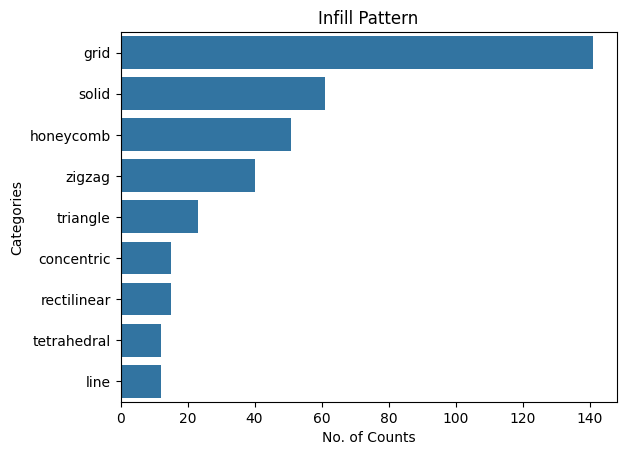

In [12]:
x_2 = pd.Series(df['infill_pattern'].value_counts()).values
y_2 = pd.Series(df['infill_pattern'].value_counts()).index
sns.barplot(x=x_2, y=y_2, orient='h')
plt.xlabel('No. of Counts')
plt.ylabel('Categories')
plt.title('Infill Pattern')
plt.show()

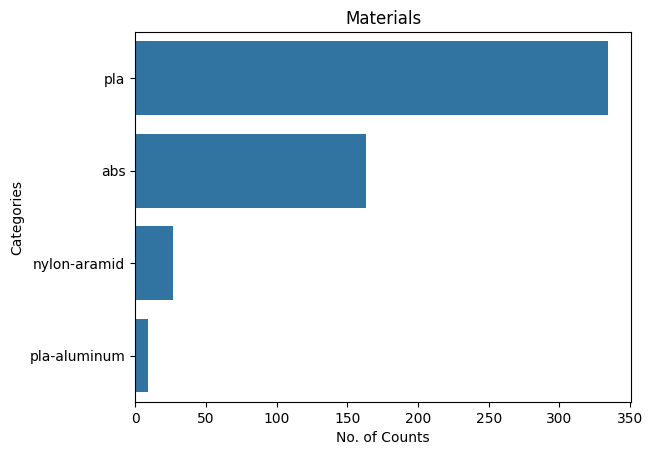

In [13]:
df['material'].value_counts()
x_3 = pd.Series(df['material'].value_counts()).values
y_3 = pd.Series(df['material'].value_counts()).index
sns.barplot(x=x_3, y=y_3, orient='h')
plt.xlabel('No. of Counts')
plt.ylabel('Categories')
plt.title('Materials')
plt.show()

In [14]:
zero_missing = pd.get_dummies(df[~df.isnull().any(axis=1)], columns=['infill_pattern','material'], dtype=int)
zero_missing

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
0,0.02,90.0,220,40.0,25.0,0,1,0,0,0,0,0,0,1,0,0
1,0.02,90.0,225,40.0,32.0,0,0,1,0,0,0,0,0,1,0,0
2,0.02,80.0,230,40.0,40.0,0,1,0,0,0,0,0,0,1,0,0
3,0.02,70.0,240,40.0,68.0,0,0,1,0,0,0,0,0,1,0,0
4,0.02,90.0,250,40.0,92.0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.10,50.0,210,150.0,5.0,0,0,0,0,0,0,1,0,0,1,0
609,0.10,100.0,210,50.0,11.0,0,0,0,0,0,0,1,0,0,1,0
610,0.20,20.0,210,150.0,10.0,0,0,0,0,0,0,1,0,0,1,0
611,0.20,50.0,210,50.0,8.0,0,0,0,0,0,0,1,0,0,1,0


In [15]:
missing = df[df.isnull().any(axis=1)]
missing_categorical = df[df['infill_pattern'].isnull()]
missing_categorical = pd.get_dummies(missing_categorical, columns=['material'], dtype=int)
missing_categorical[['material_pla-aluminum']] = 0
missing_categorical = missing_categorical.reindex(columns=list(zero_missing.columns))
missing_categorical


,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
190,0.20,30.0,210,30.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
191,0.15,20.0,190,75.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
192,0.20,10.0,190,30.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
193,0.20,20.0,200,75.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
194,0.10,10.0,190,120.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.20,40.0,195,30.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
655,0.20,50.0,195,30.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
656,0.30,30.0,195,30.0,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
657,0.30,40.0,195,30.0,19.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


In [16]:
missing_numerical = missing[~missing['infill_pattern'].isnull()]
missing_numerical = pd.get_dummies(missing_numerical, columns=['infill_pattern','material'], dtype=int)
missing_numerical.drop(columns='infill_pattern_tetrahedral')
missing_numerical[['infill_pattern_rectilinear','infill_pattern_solid']] = 0
missing_numerical = missing_numerical.reindex(columns=list(zero_missing.columns))
missing_numerical

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
50,0.20,70.0,280,NaN,2.0,0,0,0,0,0,0,0,0,0,0,NaN
51,0.20,80.0,280,NaN,2.0,0,0,0,0,0,0,0,0,0,0,NaN
52,0.20,90.0,280,NaN,2.0,0,0,0,0,0,0,0,0,0,0,NaN
53,0.20,70.0,290,NaN,2.0,0,0,1,0,0,0,0,0,0,0,NaN
54,0.20,80.0,290,NaN,2.0,0,0,1,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,0.05,NaN,205,50.0,6.0,0,1,0,0,0,0,0,0,0,1,NaN
570,0.15,NaN,190,50.0,14.0,0,1,0,0,0,0,0,0,0,1,NaN
571,0.25,NaN,220,50.0,17.0,0,1,0,0,0,0,0,0,0,1,NaN
572,0.25,NaN,205,30.0,18.0,0,1,0,0,0,0,0,0,0,1,NaN


In [17]:
n = []
mse = []
for r in range(120):
  k_1=3+2*r
  knn_1 = KNNImputer(n_neighbors=k_1, weights='distance')
  X_train, X_test = train_test_split(zero_missing, test_size=0.2, random_state=42)
  pd.DataFrame(knn_1.fit_transform(X_train))
  X_test.columns = zero_missing.columns
  X_test_copy = X_test.copy()
  X_test_copy
  np.random.seed(15)
  features =['infill_density', 'print_speed']
  for col in X_test_copy[features]:
    X_test_copy.loc[X_test_copy.sample(frac=0.1, replace=True).index,col] = np.nan
  X_test_copy.isnull().mean()
  X_test_predicted = pd.DataFrame(knn_1.transform(X_test_copy), columns=X_test_copy.columns)
  mse_1= mean_squared_error(X_test['infill_density'], X_test_predicted['infill_density'])
  mse_2= mean_squared_error(X_test['print_speed'], X_test_predicted['print_speed'])
  mse_3 =mse_1*mse_2
  n.append(k_1)
  mse.append(mse_3)

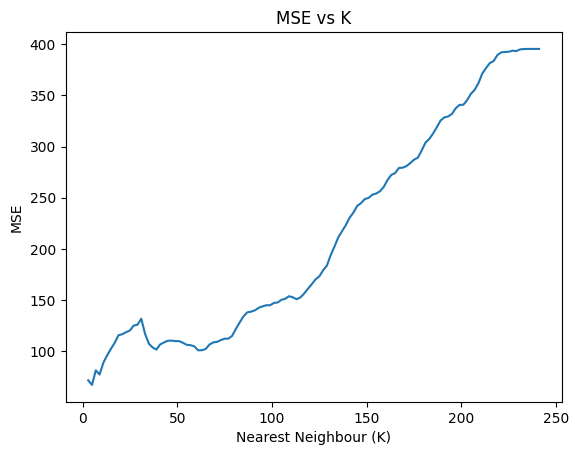

5

In [18]:
plt.plot(n, mse)
plt.xlabel('Nearest Neighbour (K)')
plt.ylabel('MSE')
plt.title('MSE vs K')
plt.show()
mse.index(min(mse))*2+3

In [19]:
knn_1 = KNNImputer(n_neighbors=mse.index(min(mse))*2+3)
knn_1.fit_transform(X_train)
missing_numerical_filled = pd.DataFrame(knn_1.transform(missing_numerical), columns=missing_numerical.columns)
zero_missing = pd.concat([zero_missing, missing_numerical_filled], axis=0)
zero_missing

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
0,0.02,90.0,220.0,40.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.02,90.0,225.0,40.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.02,80.0,230.0,40.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.02,70.0,240.0,40.0,68.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.02,90.0,250.0,40.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.05,32.0,205.0,50.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
73,0.15,32.0,190.0,50.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,0.25,64.0,220.0,50.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75,0.25,62.0,205.0,30.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
list(zero_missing.columns)[5:13]

['infill_pattern_concentric',
 'infill_pattern_grid',
 'infill_pattern_honeycomb',
 'infill_pattern_line',
 'infill_pattern_rectilinear',
 'infill_pattern_solid',
 'infill_pattern_triangle',
 'infill_pattern_zigzag']

In [21]:
n = []
r2 = []
for r in range(120):
  k=3+2*r
  knn = KNNImputer(n_neighbors=k, weights='distance')
  X_train, X_test = train_test_split(zero_missing, test_size=0.2, random_state=42)
  pd.DataFrame(knn.fit_transform(X_train))
  X_test.columns = zero_missing.columns
  X_test_copy = X_test.copy()
  X_test_copy
  np.random.seed(15)
  features = list(zero_missing.columns)[5:13]
  for col in X_test_copy[features]:
    X_test_copy.loc[X_test_copy.sample(frac=0.1, replace=True).index,col] = np.nan
  X_test_copy.isnull().mean()
  X_test_predicted = pd.DataFrame(knn_1.transform(X_test_copy), columns=X_test_copy.columns)
  r1 = mean_squared_error(X_test.loc[:,list(zero_missing.columns)[5:13]], X_test_predicted.loc[:,list(zero_missing.columns)[5:13]])

  '''mse_2= mean_squared_error(X_test['print_speed'], X_test_predicted['print_speed'])
  mse_3 =mse_1*mse_2
  mse.append(mse_3)'''
  n.append(k)
  r2.append(r)

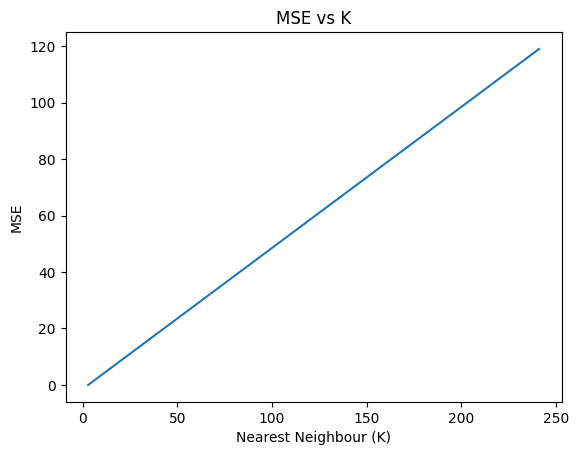

3

In [22]:
plt.plot(n, r2)
plt.xlabel('Nearest Neighbour (K)')
plt.ylabel('MSE')
plt.title('MSE vs K')
plt.show()
r2.index(min(r2))*2+3

In [23]:
knn_2 = KNNImputer(n_neighbors=r2.index(min(r2))*2+3)
knn_2.fit_transform(X_train)
missing_categorical_filled = pd.DataFrame(knn_1.transform(missing_categorical), columns=missing_categorical.columns)
zero_missing = pd.concat([zero_missing, missing_categorical_filled], axis=0)
zero_missing

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
0,0.02,90.0,220.0,40.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.02,90.0,225.0,40.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.02,80.0,230.0,40.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.02,70.0,240.0,40.0,68.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.02,90.0,250.0,40.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.20,40.0,195.0,30.0,8.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
159,0.20,50.0,195.0,30.0,4.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
160,0.30,30.0,195.0,30.0,5.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
161,0.30,40.0,195.0,30.0,19.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
df = zero_missing
df.to_csv('data_v2.csv')
